Домашнее задание 2. 

The file should be sent in the `.pdf` format created via $\LaTeX$ or [typora](<https://typora.io/>) or printed from pdf with the colab\jupyter notebook. The only handwritten part, that could be included in the solution are the figures and illustrations.

**Deadline: 08.05.22 21:59:59**

# 😱 Newton convergence issue
Рассмотрите следующую функцию:

$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фиксированным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?
(в этом задании не обязательно показывать численные симуляции)

**Ответ:**

Вычислим градиент и гессиан 
$$ \nabla^2 f(x, y) = \begin{bmatrix}3x^2 - 2 & 0 \\ 0 & 2 \end{bmatrix} ⇒ $$ 

$$\left[\nabla^2 f(x, y)\right]^{-1} = \dfrac{1}{2(3x^2-2)}\begin{bmatrix}2 & 0 \\ 0 & 3x^2 - 2 \end{bmatrix}$$
$$ \nabla f(x, y) = \begin{pmatrix}x^3 - 2x+2 \\ 2(y-1)
\end{pmatrix}$$
Тогда шаг выражается как:
$$x_{k+1} = x_k- \left[\nabla^2 f(x, y)\right]^{-1} \nabla f(x, y)$$

$$ \begin{pmatrix} x_{k+1} \\ y_{k+1}\end{pmatrix} =  \begin{pmatrix} x_{k} \\ y_{k}\end{pmatrix} - \dfrac{1}{2(3x_k^2-2)}\begin{bmatrix}2 & 0 \\ 0 & 3x_k^2 - 2 \end{bmatrix}\begin{pmatrix}x_k^3 - 2x_k+2 \\ 2(y_k-1)
\end{pmatrix} = $$

$$ =\dfrac{1}{2(3x_k^2-2)} \begin{pmatrix} 4x_k^3-4\\2(3x_2^2-2) \end{pmatrix} =\begin{pmatrix} \frac{ 2x_k^3-2}{3x_k^2-2}\\1 \end{pmatrix} $$
В силу того, что здесь в минимизируемой функции координаты $x$ и $y$ отделимы, то можно минимизировать отдельно по $x$ и по $y$. После первой итерации координата по $y$ всегда будет 1 (что соответствует минимуму по этой координате). Посмотрим на координату $x$:
$$ x_0 = 0,\, x_1 = 1,\, x_2= 0, x_3 = 1, \,\ldots  $$
Получили, что он будет прыгать между $0$ и $1$ и не сойдется к минимуму. У нас отсутствует локальная положительность гессиана (нужно было начальную точку гораздо ближе брать), поэтому мы не можем гарантировать сходимость.

**Градиентный спуск:**
Посмотрим на $k+1$ шаг:
$$ \begin{pmatrix}x_{k+1}\\ y_{k+1}\end{pmatrix} =\begin{pmatrix}x_{k}\\ y_{k}\end{pmatrix} - \alpha \begin{pmatrix}x_k^3 - 2x_k+2 \\ 2(y_k-1)
\end{pmatrix}$$
Мы знаем, что минимум по координате $y$ находится в $y^* = 1$. А шаг выражается как $$y_{k+1} = y_k(1-2\alpha)+2\alpha = y_{k-1}(1-2\alpha)^2+2\alpha(1-2\alpha)+2\alpha = \ldots $$ $$= y_0(1-2\alpha)^{k+1} + 2\alpha\sum\limits_{i=0}^k (1-2\alpha)^i \xrightarrow{k\rightarrow\infty} 0 + 2\alpha\dfrac{1}{1-(1-2\alpha)} = 1$$
По $y$ сойдемся. По $x$: исследуем производную (по координате $x$ только):
$$ \varphi(x) = x^3-2x+2 → \varphi'(x) = 3x^2 - 2 =0 → x = \pm \sqrt{\dfrac{2}{3}}$$
т.е. $\varphi(x)$ убывает на $|x| < \sqrt{\dfrac{2}{3}}$. Тогда ее минимум
$$\varphi\left(\sqrt{\dfrac{2}{3}}\right) \approx 0,9 >0 $$
т.е. функция только один раз обнуляется, на промежутке $x < -\sqrt{\dfrac{2}{3}}$. И мы, стартуя из 0, т.к. производная положительная, будем уменьшаться и сходиться к минимуму, а если вдруг перескочим минимум, то слева производная отрицательна, т.е. тоже в сторону минимума будет следующий шаг. в силу того, что $\alpha$ маленький, мы будем сходиться к минимуму.

**Наискорейший спуск:**
Никаких проблем с методом наискорейшего спуска нет, мы будем сходиться


# 🥸 Quasi Comparison
Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации следующих функций:
* Квадратичная форма $f(x) = \dfrac{1}{2}x^\top A x + b^\top x, \quad x \in \mathbb{R}^n, A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$

Сравните 2 реализованных Вами метода И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `____10^{-8} and 10^{-5}____`

Число запусков `___50____`

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. n = 2 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      1.02      |   0.0020317649841308594   |
|            SR-1           |            |      |
|            BFGS           |      11.28      |   0.004329853057861328   |
|           L-BFGS          |       9.6     |   0.0025686216354370117   |

| Квадратичная форма. n = 50 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      1.02      |   0.0008548784255981445   |
|            SR-1           |            |      |
|            BFGS           |      128.66      |   0.18035038948059082   |
|           L-BFGS          |     249.82       |  0.11153969287872315    |


| Квадратичная форма. n = 228 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      1.82      |   0.0084851598739624024   |
|            SR-1           |            |      |
|            BFGS           |      704.82      |   6.966750435829162   |
|           L-BFGS          |     56.42       |   0.3241435956954956   |

| Функция Розенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      4.86      |   0.0038908052444458006   |
|            SR-1           |            |      |
|            BFGS           |     21.36       |   0.006837077140808105   |
|           L-BFGS          |      19.32      |    0.0029642200469970703  |


In [ ]:
import numpy as np
from numpy import linalg as LA
import time
import random

class Rosen: #реализация функции Розенбока и ее производных
  def __init__(self, x):
    self.x = x
  def get_func(self):
    return (1-self.x[0])**2 + 100*(self.x[1]-self.x[0]**2)**2
  def get_grad(self):
    return np.array([-2*(1-self.x[0]) - 400*self.x[0]*(self.x[1]-self.x[0]**2), 200*(self.x[1] - self.x[0]**2)])
  def get_hes(self):
    return np.array([[2 - 400*(self.x[1] - self.x[0]**2)+800*self.x[0]**2, -400*self.x[0]], [-400*self.x[0], 200]])

class Quadratic: #реализация квадратичной функции и ее производных
  def __init__(self, x, A, b):
    self.x = x
    self.A = A
    self.b = b
  def get_func(self):
    return self.x.dot(self.A.dot(self.x))*0.5 + self.b.dot(self.x)
  def get_grad(self):
    return self.A.dot(self.x) + self.b
  def get_hes(self):
    return self.A

def Newton(f, eps):
  begin = time.time()
  x = f.x.astype(float)
  k=0
  if type(f)==Rosen:
    ans = np.array([1, 1])
    while (np.sqrt((ans - x).dot(ans - x)) > eps) and (k<21):
      x -= LA.inv(f.get_hes()).dot(f.get_grad())
      f =  Rosen(x)
      k += 1
  else:
    ans = -LA.inv(f.A).dot(f.b)
    while (np.sqrt((ans - x).dot(ans - x)) > eps) and (k<21):
      x -= LA.inv(f.get_hes()).dot(f.get_grad())
      f =  Quadratic(x, f.A, f.b)
      k += 1
  return x, k, time.time() - begin

#f =  Rosen(np.array([2,2]))
# = Quadratic(np.array([1,1,40]), np.array([[1,0,0],[0,1,0], [0,0,1]]), np.array([0,0,2]))

#x, k, time = Newton(f, 1e-8)
#print(x, k, time)

Rosenbrock iteration =  4.94
Rosenbrock time =  0.00027280330657958985
Quadratic n=2 iteration =  1.02
Quadratic n=2 time =  0.0001089191436767578
Quadratic n=50 iteration =  1.42
Quadratic n=50 time =  0.0003072357177734375
Quadratic n=228 iteration =  1.82
Quadratic n=228 time =  0.00832338809967041


In [ ]:
import scipy
from scipy.optimize import minimize
def Rosenf(x):
  return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

def Quadraticf(x):
  return x.dot(A.dot(x))*0.5 + b.dot(x)

def average(n, I):
  i = 0
  Kn = Tn = Kb = Tb = Klb = Tlb = 0
  if n ==-1:
    fB = Rosenf
    while i < I:
      x0 = np.array([2*random.random() for i in range(2)])
      f =  Rosen(x0)
      x, k, t = Newton(f, 1e-8)
      Kn += k
      Tn += t
      beginB = time.time()
      B = scipy.optimize.minimize(fB, x0, method='BFGS')
      endB = time.time()
      Kb += B.nit
      Tb += endB - beginB
      beginLB = time.time()
      LB = scipy.optimize.minimize(fB, x0, method='L-BFGS-B')
      endLB = time.time()
      Klb += LB.nit
      Tlb += endLB - beginLB
      i += 1
  else:
    while i < I+1:
      x0 = np.array([random.random() for j in range(n)])
      b = np.array([random.random() for j in range(n)])
      A = np.random.random((n, n))
      A = np.dot(A, A.T)
      f = Quadratic(x0, A, b)
      x, k, t = Newton(f, 1e-5)
      Kn += k
      Tn += t
      def Quadraticf(x):
          return x.dot(A.dot(x))*0.5 + b.dot(x)
      fB =  Quadraticf
      beginB = time.time()
      B = scipy.optimize.minimize(fB, x0, method='BFGS')
      endB = time.time()
      Kb += B.nit
      Tb += endB - beginB
      beginLB = time.time()
      LB = scipy.optimize.minimize(fB, x0, method='L-BFGS-B')
      endLB = time.time()
      Klb += LB.nit
      Tlb += endLB - beginLB
      i += 1
  return Kn/I, Tn/I, Kb/I, Tb/I, Klb/I, Tlb/I
iter, t, iterB, tB, iterLB, tLB = average(-1, 50)
print("Rosenbrock iteration Newton = ", iter)
print("Rosenbrock time Newton= ", t)
print("Rosenbrock iteration BFGS = ", iterB)
print("Rosenbrock time BFGS= ", tB)
print("Rosenbrock iteration L-BFGS = ", iterLB)
print("Rosenbrock time L-BFGS= ", tLB)

iter, t, iterB, tB, iterLB, tLB = average(2, 50)
print("Quadratic n=2 iteration = ", iter)
print("Quadratic n=2 time = ", t)
print("Quadratic n=2 iteration BFGS = ", iterB)
print("Quadratic n=2 time BFGS= ", tB)
print("Quadratic n=2 iteration L-BFGS = ", iterLB)
print("Quadratic n=2 time L-BFGS= ", tLB)

iter, t, iterB, tB, iterLB, tLB = average(50, 50)
print("Quadratic n=50 iteration = ", iter)
print("Quadratic n=50 time = ", t)
print("Quadratic n=50 iteration BFGS = ", iterB)
print("Quadratic n=50 time BFGS= ", tB)
print("Quadratic n=50 iteration L-BFGS = ", iterLB)
print("Quadratic n=50 time L-BFGS= ", tLB)

iter, t, iterB, tB, iterLB, tLB = average(228, 50)
print("Quadratic n=228 iteration = ", iter)
print("Quadratic n=228 time = ", t)
print("Quadratic n=228 iteration BFGS = ", iterB)
print("Quadratic n=228 time BFGS= ", tB)
print("Quadratic n=228 iteration L-BFGS = ", iterLB)
print("Quadratic n=228 time L-BFGS= ", tLB)


x = np.array([2*random.random() for i in range(2)])
f = Rosenf


Rosenbrock iteration Newton =  4.86
Rosenbrock time Newton=  0.0038908052444458006
Rosenbrock iteration BFGS =  21.36
Rosenbrock time BFGS=  0.006837077140808105
Rosenbrock iteration L-BFGS =  19.32
Rosenbrock time L-BFGS=  0.0029642200469970703
Quadratic n=2 iteration =  1.02
Quadratic n=2 time =  0.0020317649841308594
Quadratic n=2 iteration BFGS =  11.28
Quadratic n=2 time BFGS=  0.004329853057861328
Quadratic n=2 iteration L-BFGS =  9.6
Quadratic n=2 time L-BFGS=  0.0025686216354370117
Quadratic n=50 iteration =  1.02
Quadratic n=50 time =  0.0008548784255981445
Quadratic n=50 iteration BFGS =  128.66
Quadratic n=50 time BFGS=  0.18035038948059082
Quadratic n=50 iteration L-BFGS =  249.82
Quadratic n=50 time L-BFGS=  0.11153969287872315
Quadratic n=228 iteration =  1.82
Quadratic n=228 time =  0.008485159873962402
Quadratic n=228 iteration BFGS =  704.82
Quadratic n=228 time BFGS=  6.966750435829162
Quadratic n=228 iteration L-BFGS =  56.42
Quadratic n=228 time L-BFGS=  0.324143595

# 😺 Conjugate gradients with preconditioner

Метод 

$\begin{align}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \hbox{if } \mathbf{r}_{0} \text{ is sufficiently small, then return } \mathbf{x}_{0} \text{ as the result}\\
& \mathbf{p}_0 := \mathbf{r}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k}{\mathbf{p}_k^\mathsf{T} \mathbf{A p}_k}  \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{p}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A p}_k \\
& \qquad \hbox{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{r}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k} \\
& \qquad \mathbf{p}_{k+1} := \mathbf{r}_{k+1} + \beta_k \mathbf{p}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{align}$

В этом задании Вам предлагается рассмотреть как влияют предобуславливатели на время работы метода сопряженных градиентов.

Рассмотрим задачу минимизации квадратичной функции:

$$f(x) = \frac{1}{2}x^\top Ax -b^\top x$$

где $A\in \mathbb{S}^{n}_{++}$, $b \in \mathbb{R}^{n}$.

Как мы знаем, эта задача выпукла и минимум находится из условия $\nabla f(x^*) =Ax^*-b= 0$. То есть для решения задачи необходимо разрешить систему уравнений $Ax=b$. Можно просто применить метод сопряженных градиентов, но если матрица плохо обусловлена ($\frac{\lambda_{max}}{\lambda_{min}}>>1$), метод работает  медленно (буквально, скорость сходимости CG прямо пропорциональна $\sqrt{\kappa(A)}$).

### Preconditioning

Один из способов борьбы с этим - [использование](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) матриц-предобуславливателей разных видов и последующее решение другой задачи:

$$M A x = Mb$$

Здесь матрица **предобуславливателя** $M$ подбирается таким образом, чтобы итоговая матрица $\tilde{A} = M A$ имела меньшее число обусловленности. Существует несколько довольно простых, но зачастую сильно улучшающих работу метода предоубславливателей:

* $M = A^{-1}$ (Ideal preconditioner)
* $M = $ diag($A_{11}^{-1},A_{22}^{-1}, \ldots, A_{nn}^{-1}$) (Jacobi)
* $M \approx \hat A$, где например $\hat A$ - неполная [факторизация](http://www.math.iit.edu/~fass/477577_Chapter_16.pdf) Холецкого

###  Preconditioned Conjugate Gradients
Лучшая [ссылка](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf) - c.39.
Нет никаких проблем в том, чтобы решать новую систему $\tilde{A}x = \tilde{b}$ методов сопряженных градиентов. Однако, нативное встраивание предобуславливателя в алгоритм, делает использование этой идеи еще более эффективной. Для этого надо детально модифицировать классический CG. Кроме того, мы потребуем положительности новой матрицы $\tilde{A}$. Для этого будем использовать следующий вариант построения матрицы $M$:

$$
M^{-1} = LL^\top
$$

$$
\begin{split}
Ax = b &\leftrightarrow M^{-1}Ax = M^{-1}b \\
&\leftrightarrow L^\top Ax = L^\top b \\
&\leftrightarrow \underbrace{L^\top A L}_{\tilde{A}} \cdot \underbrace{L^{-1}x}_{\tilde{x}} = \underbrace{L^\top b}_{\tilde{b}}
\end{split}
$$

В новых переменных ($\tilde{A}, \tilde{x}, \tilde{b}$) невязка запишется, как:

$$
\tilde{r}_k = \tilde{b} - \tilde{A}\tilde{x}_k = L^\top b - (L^\top A L)(L^{-1}x_k) = L^\top b - L^\top Ax_k = L^\top r_k
$$


Факторизация Холецкого s.p.d. матрицы A - ее разложение на произведение нижнетреугольной и верхнетреугольной матрицы: $A = L^TL$ [wiki](https://en.wikipedia.org/wiki/Cholesky_decomposition).  Есть несколько упрощений этого алгоритма, позволяющих получить матрицу, "похожую" на A. Мы будем использовать следующую:  $if \quad (a_{i,j} =0) \rightarrow l_{i,j} = 0$, а далее по алгоритму.

**Задание** Выбрать 1 задачу [отсюда](https://sparse.tamu.edu ) (выбирайте формат matrix market - его умеет читать [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.mmread.html) ), исследовать как влияет на скорость сходимости тот или иной предоубславливатель:

1) Сравнить число итераций, за которое метод сходится с точностью $10^{-7}$ для двух предобуславливателей и для обычного метода сопряженных градиентов.

2) Построить графики зависимости нормы невязки $\|r_k\| = \|Ax_k - b\|$ от номера итерации для трех предобуславливателей и для обычного метода сопряженных градиентов. Обратите внимание, что в этом задании можно использовать дефолтный метод сопряженных градиентов из [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) - там есть возможность в качестве аргумента передать preconditioner.

3) Сравнить итоговое время работы методов до сходимости. Обратите внимание, что для честного сравнения по времени не стоит использовать дополнительных сложных callback-ов.

Пример:

![](https://pp.userapi.com/c831309/v831309597/108727/JXO7HGHv8r4.jpg)

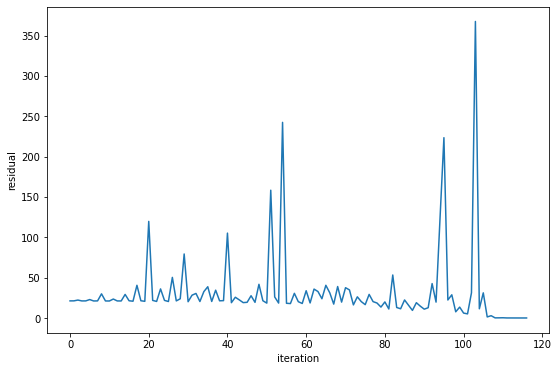

In [ ]:
import scipy.io 
from scipy.io import mmread
import io
import inspect
import matplotlib.pyplot as plt
n=85
b = np.ones(n)
A = mmread('ash85.mtx')
A = np.array(A.todense())
Inv = LA.inv(A) #М для первого метода
Jacobi = np.diag([(A[i][i])**(-1) for i in range(n)]) #М для второго метода
#Cholesky = np.linalg.cholesky(A @ A.T) #просто исходная матрица А не положительно 
#определенная, а для этой реализации требуется положительная определенность

def solve_sparse(A, b):
  residual = []
  num_iters = 0

  def callback(xk):
    nonlocal num_iters
    num_iters+=1
    #frame = inspect.currentframe().f_back
    #residual.append(frame.f_locals['resid'])
    residual.append(np.sqrt((xk-answ).T @ (xk-answ)))
  
  x, status = scipy.sparse.linalg.cg(A, b, tol=1e-5, M = None, callback = callback)
  return x, num_iters, residual

answ = scipy.sparse.linalg.cg(A, b, tol=1e-5)[0]
x, N, residual = solve_sparse(A, b)
print()
fig = plt.figure(figsize=(9,6))
plt.xlabel("iteration")
plt.ylabel("residual")
plt.plot(np.arange(N),residual)
plt.show()

С $M = A^{-1}$ достаточно *одной* итерации. С $M = Jacobi$ требуется столько же операций, сколько и при обычном методе (потому что у меня не очень удачная матрица и там $M = Jacobi = I$ вышла единичная матрица в предобуславливателе. У меня это $117$ итераций. Поэтому я график построила только для просто cg (и он совпадает с Jacobi)



# 🪅 Stochastic optimization tricks

You will study stochastic optimization in the setting of timeseries anomaly detection using an autoencoder.
[source](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)

## Introduction

This script demonstrates how you can use a reconstruction convolutional
autoencoder model to detect anomalies in timeseries data.

## Setup

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](
https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artifical
timeseries data containing labeled anomalous periods of behavior. Data are
ordered, timestamped, single-valued metrics.

We will use the `art_daily_small_noise.csv` file for training and the
`art_daily_jumpsup.csv` file for testing. The simplicity of this dataset
allows us to demonstrate anomaly detection effectively.

In [ ]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

## Quick look at the data

In [ ]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


## Visualize the data
### Timeseries data without anomalies

We will use the following data for training.

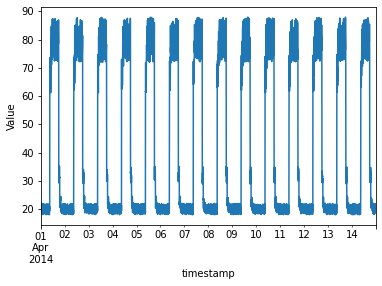

In [ ]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.ylabel('Value')
plt.show()

### Timeseries data with anomalies

We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

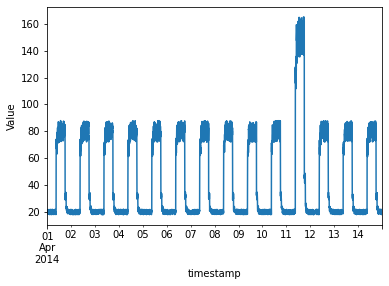

In [ ]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.ylabel('Value')
plt.show()

## Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


### Create sequences
Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


## Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

## Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 88ms/step - loss: 0.3538 - val_loss: 0.0978
Epoch 2/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0641 - val_loss: 0.0470
Epoch 3/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0447 - val_loss: 0.0354
Epoch 4/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0367 - val_loss: 0.0302
Epoch 5/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0310 - val_loss: 0.0258
Epoch 6/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0267 - val_loss: 0.0228
Epoch 7/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0239 - val_loss: 0.0193
Epoch 8/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0216 - val_loss: 0.0177
Epoch 9/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0202 - val_loss: 0.0166
Epoch 10/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0191 - val_loss: 0.0161
Epoch 11/

Let's plot training and validation loss to see how the training went.

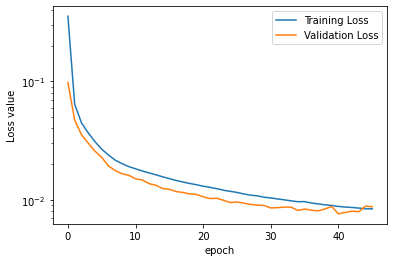

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.


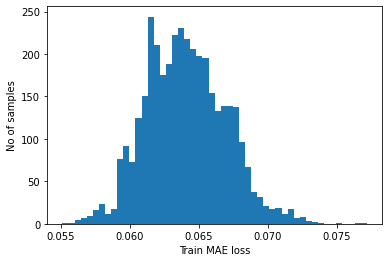

Reconstruction error threshold:  0.07715260187695949


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

### Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

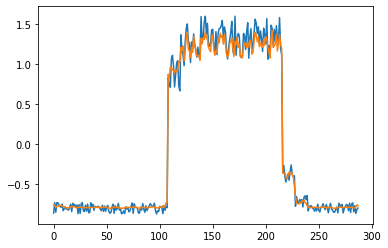

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

### Prepare test data

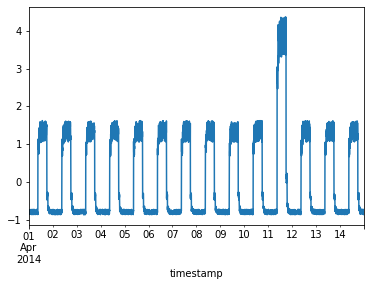

Test input shape:  (3745, 288, 1)


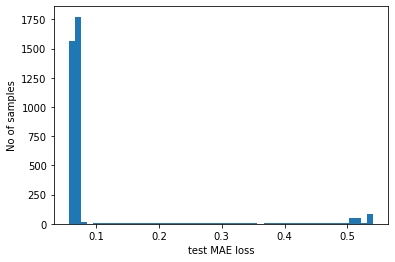

Number of anomaly samples:  400
Indices of anomaly samples:  (array([ 397, 2523, 2699, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708,
       2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719,
       2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730,
       2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741,
       2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752,
       2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763,
       2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774,
       2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785,
       2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796,
       2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807,
       2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818,
       2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829,
       2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2

In [ ]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

## Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

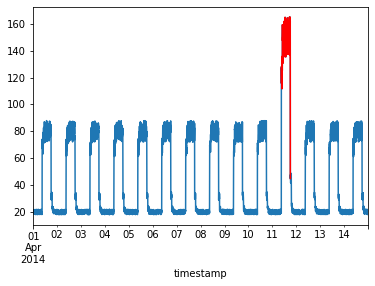

In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

## Exercises:
In this problem you are to compare different ideas of stochastic optimization. Ensure, that the algorithms are compared in the same setting: same initialization (fix the [seed](https://keras.io/api/layers/initializers/)!) and same amount of epochs. 

### Learning rate schedule
* Train model using SGD optimizer with default hyperparameters. 
* Train model using SGD optimizer with learning rate decay. Instructions can be found via [this](https://keras.io/api/optimizers/learning_rate_schedules/) link. 
* Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD()

### Acceleration
* Train model using SGD optimizer with default hyperparameters. 
* Train model using SGD optimizer with momentum term. 
* Train model using SGD optimizer with nesterov momentum term. Instructions can be found via [this](https://keras.io/api/optimizers/sgd/) link.  
* Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

### Adaptive methods
* Train model using SGD optimizer with default hyperparameters. 
* Train model using any adaptive method. Instructions can be found via [this](https://keras.io/api/optimizers/) link.  
* Compare the results.
* Try to perform different runs of SGD + Momentum and select the best hyperparameters. Do the same for the Adam in the similar setting. Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

[Link](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/keras/Simple_Keras_Integration.ipynb) to the keras + wandb.

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Initialize wandb with your project name
run = wandb.init(project='my-keras-integration',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.01,
                     "epochs": 50,
                     "batch_size": 128,
                     "loss_function": "mse",
                     "architecture": "Autoencoder",
                     "dataset": "Daily anomaly"
                 })
config = wandb.config  # We'll use this to configure our experiment